In [ ]:
#библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('./lab_data/zeta.csv')

In [ ]:
df.head()

,Unnamed: 0,zcta,sex,meanage,meaneducation,meanemployment,meanhouseholdincome
0,1,602,F,37.403347,10.912822,0.740029,18533.844
1,2,602,M,35.935740,10.692618,1.343883,18533.844
2,3,604,F,31.809427,13.913371,1.085855,40784.491
3,4,604,M,31.104254,14.264654,1.602559,40784.491
4,5,606,F,35.990794,10.097773,0.628753,17496.526


In [ ]:
df = df[df["sex"] == 'F']

In [ ]:
df.head()

,Unnamed: 0,zcta,sex,meanage,meaneducation,meanemployment,meanhouseholdincome
0,1,602,F,37.403347,10.912822,0.740029,18533.844
2,3,604,F,31.809427,13.913371,1.085855,40784.491
4,5,606,F,35.990794,10.097773,0.628753,17496.526
6,7,610,F,37.260141,10.969157,0.854325,19416.410
8,9,612,F,40.427321,11.575772,0.781539,21607.340


In [ ]:
df = df.drop(columns=['zcta', 'sex'])

In [ ]:
df.head()

,Unnamed: 0,meanage,meaneducation,meanemployment,meanhouseholdincome
0,1,37.403347,10.912822,0.740029,18533.844
2,3,31.809427,13.913371,1.085855,40784.491
4,5,35.990794,10.097773,0.628753,17496.526
6,7,37.260141,10.969157,0.854325,19416.410
8,9,40.427321,11.575772,0.781539,21607.340


In [ ]:
filtered_df = df.query('(8 < meaneducation < 18) & (10000 < meanhouseholdincome < 200000) & (0 < meanemployment < 3) & (20 < meanage < 60)')


In [ ]:
filtered_df

,Unnamed: 0,meanage,meaneducation,meanemployment,meanhouseholdincome
0,1,37.403347,10.912822,0.740029,18533.844
2,3,31.809427,13.913371,1.085855,40784.491
4,5,35.990794,10.097773,0.628753,17496.526
6,7,37.260141,10.969157,0.854325,19416.410
8,9,40.427321,11.575772,0.781539,21607.340
...,...,...,...,...,...
64064,64065,38.462668,13.497529,2.058552,59851.160
64068,64069,38.013423,12.224299,1.664000,42192.857
64070,64071,33.637363,12.552381,1.295082,37734.266
64072,64073,34.616732,12.624444,1.779851,49624.771


In [ ]:
if (filtered_df['meanhouseholdincome'] <= 0).any():
    print("Есть")

In [ ]:
# Создание новой переменной log_income
log_income = np.log10(filtered_df['meanhouseholdincome'][filtered_df['meanhouseholdincome'] > 0])
print(log_income)

0        4.267966
2        4.610495
4        4.242952
6        4.288169
8        4.334601
           ...   
64064    4.777073
64068    4.625239
64070    4.576736
64072    4.695699
64074    4.515053
Name: meanhouseholdincome, Length: 31429, dtype: float64


In [ ]:
filtered_df.rename(columns={'meanage': 'age', 'meaneducation': 'education', 'meanemployment': 'employment'}, inplace=True)

<ipython-input-12-f5640961c537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'meanage': 'age', 'meaneducation': 'education', 'meanemployment': 'employment'}, inplace=True)


In [ ]:
filtered_df

,Unnamed: 0,age,education,employment,meanhouseholdincome
0,1,37.403347,10.912822,0.740029,18533.844
2,3,31.809427,13.913371,1.085855,40784.491
4,5,35.990794,10.097773,0.628753,17496.526
6,7,37.260141,10.969157,0.854325,19416.410
8,9,40.427321,11.575772,0.781539,21607.340
...,...,...,...,...,...
64064,64065,38.462668,13.497529,2.058552,59851.160
64068,64069,38.013423,12.224299,1.664000,42192.857
64070,64071,33.637363,12.552381,1.295082,37734.266
64072,64073,34.616732,12.624444,1.779851,49624.771


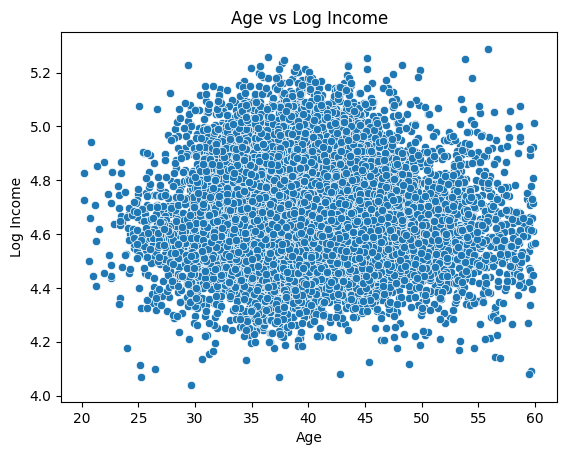

In [ ]:
sns.scatterplot(x='age', y=log_income, data=filtered_df)
plt.title('Age vs Log Income')
plt.xlabel('Age')
plt.ylabel('Log Income')
plt.show()

In [ ]:
x_age = sm.add_constant(filtered_df['age'])  # Матрица независимых переменных
y = log_income                           # Зависимая переменная

In [ ]:
# Создание и обучение модели
model_age = sm.OLS(y, x_age).fit()

In [ ]:
print(model_age.summary())

                             OLS Regression Results                            
Dep. Variable:     meanhouseholdincome   R-squared:                       0.012
Model:                             OLS   Adj. R-squared:                  0.012
Method:                  Least Squares   F-statistic:                     376.5
Date:                 Wed, 29 Nov 2023   Prob (F-statistic):           2.22e-83
Time:                         11:42:13   Log-Likelihood:                 17962.
No. Observations:                31429   AIC:                        -3.592e+04
Df Residuals:                    31427   BIC:                        -3.590e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7877      0.006    740.48

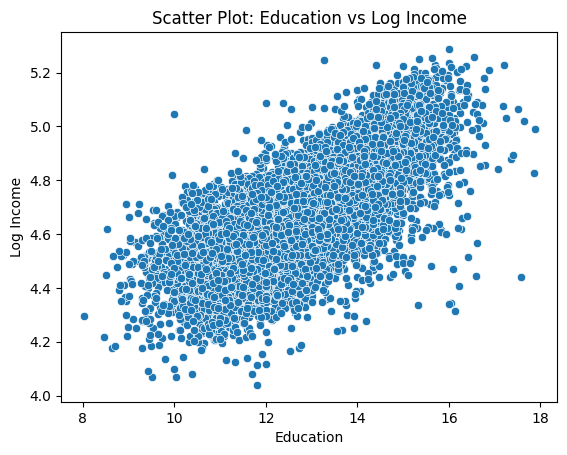

In [ ]:
sns.scatterplot(x='education', y=log_income, data=filtered_df)
plt.title('Scatter Plot: Education vs Log Income')
plt.xlabel('Education')
plt.ylabel('Log Income')
plt.show()

In [ ]:
x_ed = sm.add_constant(filtered_df['education'])  # Матрица независимых переменных

In [ ]:
model_ed = sm.OLS(y, x_ed).fit()
print(model_ed.summary())

                             OLS Regression Results                            
Dep. Variable:     meanhouseholdincome   R-squared:                       0.535
Model:                             OLS   Adj. R-squared:                  0.535
Method:                  Least Squares   F-statistic:                 3.622e+04
Date:                 Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                         11:42:17   Log-Likelihood:                 29823.
No. Observations:                31429   AIC:                        -5.964e+04
Df Residuals:                    31427   BIC:                        -5.962e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3897      0.007    504.99

In [ ]:
x_series = sm.add_constant(filtered_df[['age', 'education', 'employment']])

In [ ]:
polinom_model = sm.OLS(y, x_series).fit()
print(polinom_model.summary())

                             OLS Regression Results                            
Dep. Variable:     meanhouseholdincome   R-squared:                       0.570
Model:                             OLS   Adj. R-squared:                  0.570
Method:                  Least Squares   F-statistic:                 1.387e+04
Date:                 Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                         11:42:19   Log-Likelihood:                 31028.
No. Observations:                31429   AIC:                        -6.205e+04
Df Residuals:                    31425   BIC:                        -6.201e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5123      0.008    460.20

In [ ]:
predicted_values = polinom_model.predict(x_series)

Text(0, 0.5, 'Предсказанный доход')

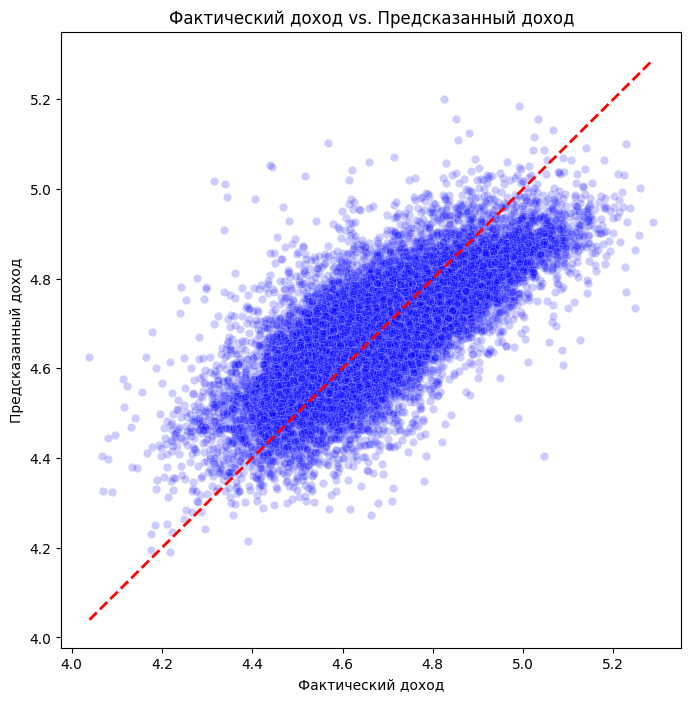

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y, y=predicted_values, color='blue', alpha=0.2)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2)
plt.title('Фактический доход vs. Предсказанный доход')
plt.xlabel('Фактический доход')
plt.ylabel('Предсказанный доход')